## Installing required packages

In [55]:
!pip install tensorflow-gpu==2.1.0
!pip install cirq==0.7.0 pathos==0.2.5 tensorflow-quantum==0.2.0

## Importing the dataset and required packages

In [56]:
import tensorflow as tf

# Data Processing tools
import numpy as np
from sklearn.model_selection import train_test_split 

# QML tools
import tensorflow_quantum as tfq
import cirq
import sympy

# Visualization Tools
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

In [57]:
#Lets print the version of cirq and tfq that we will use
print("We are using the TensorFlow-Quantum version {}".format(tfq.__version__))
print("We are using the Cirq version {}".format(cirq.__version__))

We are using the TensorFlow-Quantum version 0.2.0
We are using the Cirq version 0.7.0


In [58]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your class names
CLASS_NAMES = np.array(['Basalt', 'Coal', 'Granite', 'Limestone', 'Marble', 'Sandstone', 'Quartzite'])

# Define your data directories
train_path = "C:/Users/rahul/OneDrive/Desktop/Practice/Dataset"
test_path = "C:/Users/rahul/OneDrive/Desktop/Practice/Dataset"

# Define batch size and image dimensions
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Create data generators
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)

val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode='sparse')

# Load the data as (X_train, y_train), (X_test, y_test)
(X_train, y_train) = train_data_gen.next()
(X_test, y_test) = val_data_gen.next()

# Now, you have the data in the format you wanted


Found 2069 images belonging to 7 classes.
Found 2069 images belonging to 7 classes.


In [59]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (32, 224, 224, 3)
The shape of the y_train is (32,)
The shape of the X_test is (32, 224, 224, 3)
The shape of the y_test is (32,)


## Preprocessing the Dataset

In [60]:
def filter_data(x, y):
  """
  Helper Function to filter the dataset
  """
  return x,y

In [61]:
#Filter the train set
X_train, y_train = filter_data(X_train, y_train)

#Filter the test_set
X_test, y_test = filter_data(X_test, y_test)

In [62]:
# Let's have a look at the shapes of train and test data
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (32, 224, 224, 3)
The shape of the y_train is (32,)
The shape of the X_test is (32, 224, 224, 3)
The shape of the y_test is (32,)


The First Image has the label 1.0


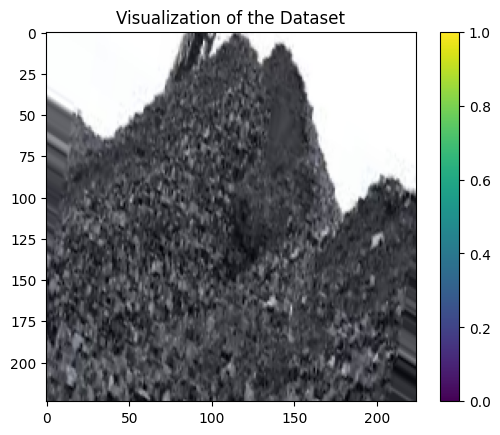

In [63]:
import matplotlib.pyplot as plt  # Add this line to import Matplotlib
#Let's have a look at the first image from our X_train and the 
# corresponding label from y_train
print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

From the colorbar in the above visualization, it is clear that we have grayscale images in the dataset and hence their values range from 0 to 255. However, we would like to scale these pixel values in our dataset so that the values range from 0 to 1. This will help us to converge our CNN training faster

In [64]:
#Normalizing the train and test image data
X_train = X_train/255.0
X_test = X_test/ 255.0

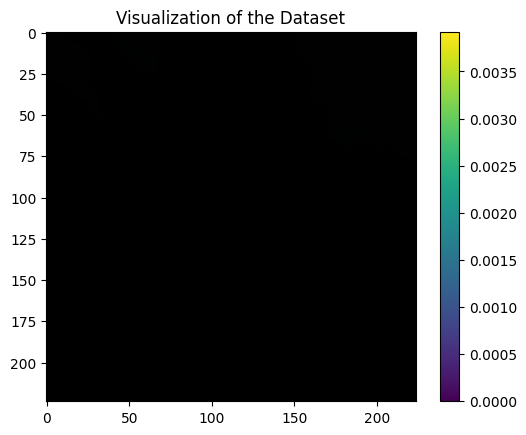

In [65]:
#Let's again have a look at the first image from our X_train and
#see if we have successfully normalized the datasets
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [66]:
#Before proceeding, we need to reshape our images in the dataset
X_train = X_train.reshape(X_train.shape[0], *(224,224,3))
X_test = X_test.reshape(X_test.shape[0], *(224,224,3))

In [67]:
# Downscaling the images
X_train = tf.image.resize(X_train, (2,2)).numpy()
X_test = tf.image.resize(X_test, (2,2)).numpy()


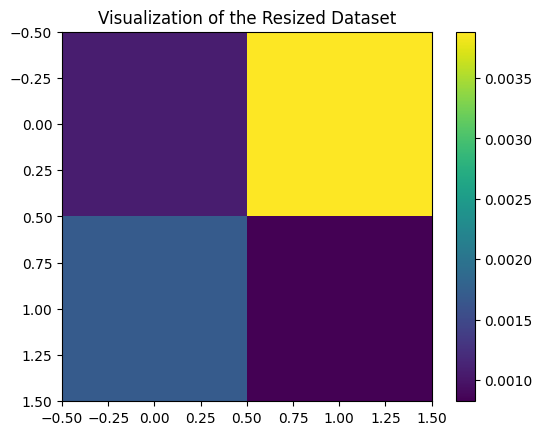

In [68]:
#Let's again have a look at the first image from our resized X_train
plt.imshow(X_train[0,:,:,0])
plt.colorbar()
plt.title('Visualization of the Resized Dataset')
plt.show()

In [69]:
#Splitting the training fdataset into train and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state=0)

In [70]:
print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the y_valid is {}".format(y_valid.shape))

The shape of the X_train is (27, 2, 2, 3)
The shape of the y_train is (27,)
The shape of the X_valid is (5, 2, 2, 3)
The shape of the y_valid is (5,)


## Data Encoding

Steps involved in Data Encoding:

* Processing pixel values for binary encoding

* Converting Cirq Circuits to tfq tensors

**Step 1: Processing Pixel Values for Binary Encoding**

In [71]:
# FLattening the images
X_train = X_train.reshape(X_train.shape[0],-1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

### Processing X_train

In [72]:
#Let's have a look on the first example
print(X_train[0])
print(X_test[0])

[0.00219811 0.00222226 0.00217943 0.0033729  0.00345076 0.00349398
 0.00155331 0.00155331 0.00155171 0.0037774  0.0037774  0.0037774 ]
[0.00269127 0.00279892 0.00322953 0.00074587 0.00071511 0.00055363
 0.00170704 0.00170704 0.00167628 0.00136102 0.00137639 0.00135333]


In [73]:
def binary_encode(X, threshold=0.5):
    encoded_images = []
    for flattened_image in X:
        # pixel value is 1 if it's greater than threshold or else zero
        encoded_image = [1 if pixel > threshold else 0 for pixel in flattened_image]
        encoded_images.append(encoded_image)
    return np.array(encoded_images)


In [74]:
X_train = binary_encode(X_train)

In [75]:
# Now, Let's have a look on the first example again
print(X_train[0])

[0 0 0 0 0 0 0 0 0 0 0 0]


In [76]:
print("The shape of the X_train is {}".format(X_train.shape))

The shape of the X_train is (27, 12)


In [77]:
import cirq

def create_circuit_from_image(encoded_image):
    """
    Returns a circuit for the given encoded image.

    Parameters:
    encoded_image (array): Encoded Image

    Returns:
    circuit (cirq.Circuit object): cirq circuit
    """
    num_qubits = len(encoded_image)
    qubits = cirq.GridQubit.rect(1, num_qubits)
    circuit = cirq.Circuit()
    
    for i, pixel in enumerate(encoded_image):
        if pixel:
            circuit.append(cirq.X(qubits[i]))
    
    return circuit


In [78]:
X_train = [create_circuit_from_image(encoded_image) for encoded_image in X_train]

In [79]:
# Let's have a look at the circuit for the first image
print(X_train[0])

Recall that the values for the first image were 0,0,1,1. This implies that we should apply X or NOT gate the last two qubuts since all the qubits are intially in the 0 states. Applying a X gate will change this state from zero to one. Therefore, we shall apply X Gate on the last two qubits. We have initialized the four qubits in a rectangular grid. Therefore, the initialized qubits are (0,0), (0,1), (1,0) and (1,1). In the above circuit diagram, note that we have a X gate on the qubits (1,0) and (1,1) which are the last two qubits. Hence, we have successfully created circuit for our image. 

**Step 2: Converting Cirq Circuits to tfq Tensors**

In [80]:
X_train_tfq = tfq.convert_to_tensor(X_train)

### Processing X_valid and X_test

In [81]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [82]:
X_valid = [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [83]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

## Quantum Neural Network

### Build the QNN

Building the Quantum Neural Network involves two steps

* build a class that adds gates layer by layer

* define the QNN using the class from the above step

In [84]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds single qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate 
      Returns:
      None
      """
      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds two qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate
      Returns:
      None
      """
      if len(qubit_index)!=2:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):
      """
      Adds New Gates/Layers to the Circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      symbol_gate(string): symbol for the gate
      Returns:
      None
      """
      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)


In [85]:
def create_qnn():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(2,2)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    qnn = QNN(
        data_qubits = data_qubits,
        readout=readout)
    
    """
    # Though we don't use single and double Qubit Gates in our Circuit, we provide 
    # the methods "add_singleQubit_gate" and "add_twoQubit_gate" for our Class QNN
    # that can be used to add Single and Double Qubit Gates respectively.
    # An exmaple is shown below:

    #Add Hadamard Gates
    qnn.add_singleQubit_gate(circuit, cirq.H, [0,1,2,3])

    #Add CNOT gates
    qnn.add_twoQubit_gate(circuit, cirq.CNOT, [0, 1])
    qnn.add_twoQubit_gate(circuit, cirq.CNOT, [2, 3])
    """

    # Add the ising coupling XX gate
    qnn.add_layer(circuit, cirq.XX, "xx")
    qnn.add_layer(circuit, cirq.ZZ, "zz")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [86]:
qmodel, model_readout = create_qnn()

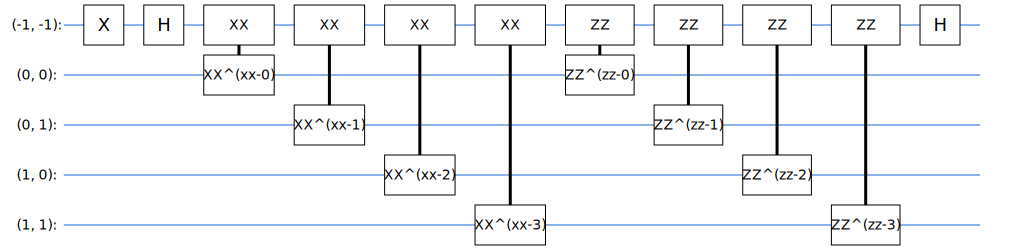

In [87]:
#Let's have a look at our Qauntum Circuit that will perform the classification
SVGCircuit(qmodel)

In [88]:
model = tf.keras.Sequential([
                             
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),

    
    # The PQC stands for Paramaterized Quantum Circuit
    # This returns the expectation value
    tfq.layers.PQC(qmodel, model_readout),
])

In [89]:
# Let's have a look at the first label from the training dataset
print(y_train[0])

3.0


In [90]:
# To use Hinge Loss, we convert the labels to 1 and -1
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])     

In [91]:
# Define the custom Hinge Accuracy
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

### Train the QNN

In [92]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [93]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=10,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Train on 27 samples, validate on 5 samples
Epoch 1/10
27/27 [==============================] - 1s 50ms/sample - loss: 0.5754 - hinge_accuracy: 0.7778 - val_loss: 0.5385 - val_hinge_accuracy: 0.8000
Epoch 2/10
27/27 [==============================] - 0s 2ms/sample - loss: 0.5727 - hinge_accuracy: 0.7778 - val_loss: 0.5356 - val_hinge_accuracy: 0.8000
Epoch 3/10
27/27 [==============================] - 0s 1ms/sample - loss: 0.5700 - hinge_accuracy: 0.7778 - val_loss: 0.5328 - val_hinge_accuracy: 0.8000
Epoch 4/10
27/27 [==============================] - 0s 1ms/sample - loss: 0.5674 - hinge_accuracy: 0.7778 - val_loss: 0.5300 - val_hinge_accuracy: 0.8000
Epoch 5/10
27/27 [==============================] - 0s 2ms/sample - loss: 0.5648 - hinge_accuracy: 0.7778 - val_loss: 0.5272 - val_hinge_accuracy: 0.8000
Epoch 6/10
27/27 [==============================] - 0s 1ms/sample - loss: 0.5622 - hinge_accuracy: 0.7778 - val_loss: 0.5245 - val_hinge_accuracy: 0.8000
Epoch 7/10
27/27 [==============

In [94]:
model.evaluate(X_test_tfq, y_test_h)

32/32 [==============================] - 0s 4ms/sample - loss: 0.5950 - hinge_accuracy: 0.7500


[0.5949921607971191, 0.75]

## Visualize the Results

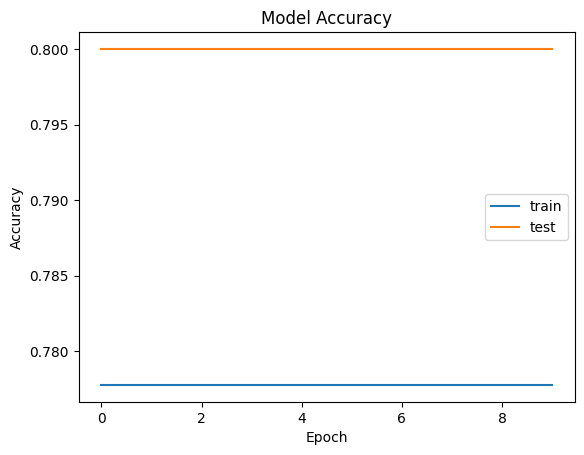

In [95]:
# Visualize Accuracy
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

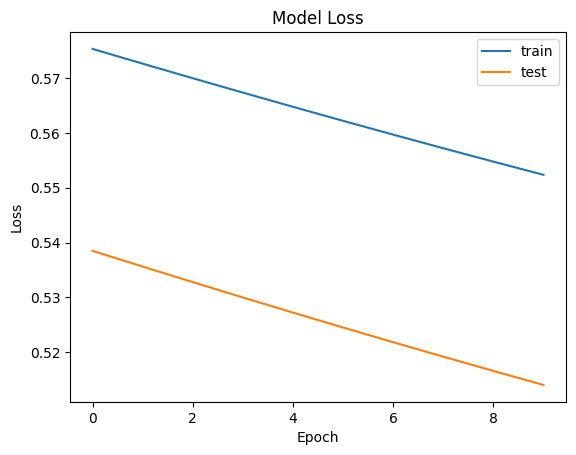

In [96]:
# Visualize Loss
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()

## Save The Model Weights

In [97]:
#Saving the weights
model.save_weights('C:\\Users\\rahul\\OneDrive\\Desktop\\Practice\\ModelWeights')

In [ ]:
# Load your pretrained TFQ model
model = tf.keras.models.load_model('C:\\Users\\rahul\\OneDrive\\Desktop\\Practice\ModelWeights')


In [ ]:
predictions = model.predict(new_quantum_data)